## Import libraries

In [ ]:
import os
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt

In [22]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

## Bio/Veg Data Load and Plot

In [11]:
# from src.constants import GWS_DATA_DIR
GWS_DATA_DIR = Path("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity")

# Getting biotope data
bio_path = GWS_DATA_DIR / "chernobyl_habitat_data" / "Biotope_EUNIS_ver1.shp"
bio_data = gpd.read_file(bio_path)

# getting vegetation data
veg_path = GWS_DATA_DIR / "chernobyl_habitat_data" / "Vegetation_mape.shp"
veg_data = gpd.read_file(veg_path)

<AxesSubplot:>

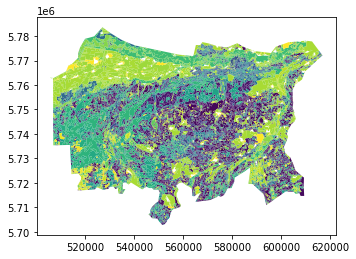

In [20]:
veg_data = gpd.read_file(GWS_DATA_DIR / "chernobyl_habitat_data" / "Vegetation_mape.shp")
# print(veg_data.crs.__repr__())
veg_data.plot("Vegetation")
# veg_data.sample(10)

<AxesSubplot:>

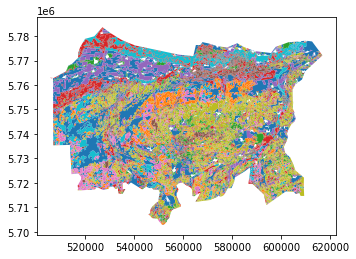

In [21]:
biotope_data = gpd.read_file(GWS_DATA_DIR / "chernobyl_habitat_data" / "Biotope_EUNIS_ver1_1.shp")
# print(biotope_data.crs.__repr__())
biotope_data.plot("Eunis_name")
# biotope_data.sample(10)

## Chernobyl Plot

In [28]:
from arcgis import GIS
from arcgis.learn import UnetClassifier, prepare_data
ent_gis = GIS(
    "https://pythonapi.playground.esri.com/portal",
    "arcgis_python",
    "amazing_arcgis_123",
)
# rasTempLyr = arcpy.MakeRasterLayer_management(label_layer, 'tempRas')
# activeMap = aprx.activeMap
m = ent_gis.map("Chernobyl, Kyyivs’ka Oblast'")
# m.addLayer(rasTempLyr, 'TOP')
print(m)
m

MapView(layout=Layout(height='400px', width='100%'))


MapView(layout=Layout(height='400px', width='100%'))

In [10]:
from pathlib import Path
import rasterio
from rasterio.plot import show
from rasterio.enums import ColorInterp
CEDA_DIR = Path("/") / "neodc"
LANDCOVER_DIR = (
    CEDA_DIR / "esacci" / "land_cover" / "data" / "land_cover_maps" / "v2.0.7"
)
# Load sample data file:
label_layer = LANDCOVER_DIR / "ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif"
image = rasterio.open(label_layer)
#image.colorinterp
#image.colorinterp = [ColorInterp.green]
show(image.read()[0, 0:1000, 0:1000], transform=image.transform, cmap="pink")
# image.meta['count']

MemoryError: Unable to allocate 7.82 GiB for an array with shape (1, 64800, 129600) and data type uint8

## Plot Part of Image

In [10]:
import rasterio
image = rasterio.open(label_layer)
image.read().shape

MemoryError: Unable to allocate 7.82 GiB for an array with shape (1, 64800, 129600) and data type uint8

In [7]:
from arcgis.raster import analytics

In [8]:
ds = analytics.get_datastores(gis=ent_gis)
ds

<DatastoreManager for https://pythonapi.playground.esri.com/ra/admin>

In [9]:
ds.search()

[<Datastore title:"/fileShares/ListDatastoreContent" type:"folder">,
 <Datastore title:"/rasterStores/RasterDataStore" type:"rasterStore">]

In [10]:
rasterstore = ds.get("/rasterStores/RasterDataStore")
rasterstore

<Datastore title:"/rasterStores/RasterDataStore" type:"rasterStore">

In [11]:
samplefolder = "landcover_sample_world_imagery"
samplefolder

'landcover_sample_world_imagery'

In [13]:
import arcgis
from arcgis import learn
arcgis.env.verbose = True

In [15]:
export = learn.export_training_data(input_raster = world_imagery_layer,
                                    output_location = samplefolder,
                                    input_class_data = veg_data.url, 
                                    chip_format = "PNG", 
                                    tile_size = {"x":400,"y":400}, 
                                    stride_size = {"x":0,"y":0}, 
                                    metadata_format = "Classified_Tiles",                                        
                                    context = {"startIndex": 0, "exportAllTiles": False, "cellSize": 2},
                                    # context = context,
                                    gis = ent_gis)

NameError: name 'world_imagery_layer' is not defined

In [16]:
from arcgis.gis import GIS
gis = GIS()
gis.map()

MapView(layout=Layout(height='400px', width='100%'))

In [28]:
import src.constants as cst

In [29]:
cst.GWS_DATA_DIR

PosixPath('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity')

In [44]:
import rasterio
from rasterio import plot as rplot
from rasterio.plot import show as rshow
import matplotlib.pyplot as plt

## Xarray object with paths in 

In [54]:
import os
import numpy as np
import xarray as xr

def return_path_dataarray():
    incomplete_years = [1984, 1994, 2002, 2003, 2008]
    years = [year for year in range(1984, 2021) if year not in incomplete_years]
    im_type = ["hab", "chern"]
    month_groups = ["JFM", "AMJ", "JAS", "OND"]
    directory = (
        "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data"
    )
    # year, month_group, im_type
    path_array = np.empty([len(years), len(month_groups), len(im_type)], dtype=object)
    for year in years:
        if year not in incomplete_years:
            path = os.path.join(directory, str(year))
            for i in os.listdir(path):
                full_name = os.path.join(path, i)
                coord_list = [years, month_groups, im_type]
                indices = []
                for coord_no, coord in enumerate(coord_list):
                    for counter, value in enumerate(coord):
                        if str(value) in full_name:
                            indices.append(counter)
                path_array[indices[0], indices[1], indices[2]] = full_name
    da = xr.DataArray(
        data=path_array,
        dims=["yr", "mn", "ty"],
        coords=dict(
            yr=years,
            mn=month_groups,
            ty=im_type,
        ),
        attrs=dict(
            description="Paths to tif.",
        ),
    )
    return da

In [56]:
da = return_path_dataarray()
print(da.isel(yr=20, mn=0, ty=0))

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2009/L5_hab_2009_JFM.tif',
      dtype=object)
Coordinates:
    yr       int64 2009
    mn       <U3 'JFM'
    ty       <U5 'hab'
Attributes:
    description:  Paths to tif.


<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_JFM.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'JFM'
    ty       <U5 'hab'
Attributes:
    description:  Paths to tif.


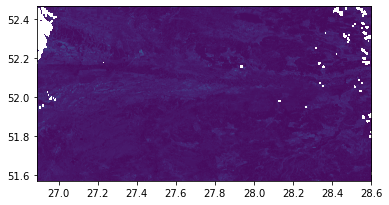

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_JFM.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'JFM'
    ty       <U5 'chern'
Attributes:
    description:  Paths to tif.


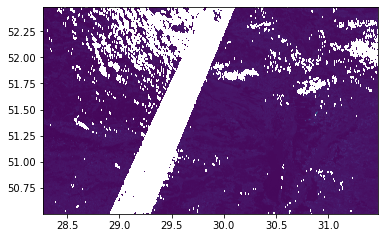

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_AMJ.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'AMJ'
    ty       <U5 'hab'
Attributes:
    description:  Paths to tif.


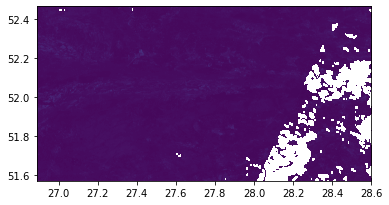

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_AMJ.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'AMJ'
    ty       <U5 'chern'
Attributes:
    description:  Paths to tif.


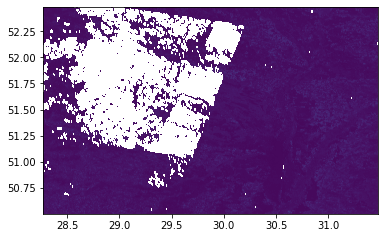

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_JAS.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'JAS'
    ty       <U5 'hab'
Attributes:
    description:  Paths to tif.


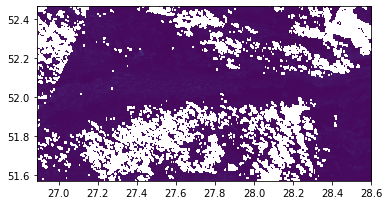

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_JAS.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'JAS'
    ty       <U5 'chern'
Attributes:
    description:  Paths to tif.


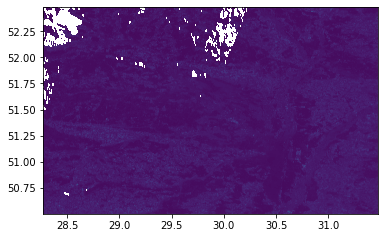

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_OND.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'OND'
    ty       <U5 'hab'
Attributes:
    description:  Paths to tif.


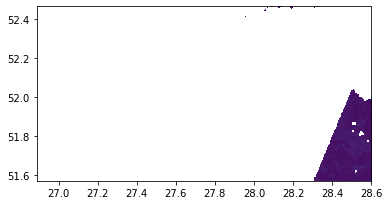

<xarray.DataArray ()>
array('/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_OND.tif',
      dtype=object)
Coordinates:
    yr       int64 1990
    mn       <U3 'OND'
    ty       <U5 'chern'
Attributes:
    description:  Paths to tif.


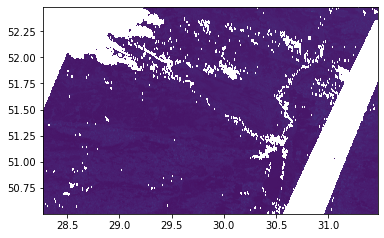

In [72]:
import rasterio
da = return_path_dataarray()
for yr in [5]:
    for mn in range(4):
        for ty in range(2):
            da_entry = da.isel(yr=yr, mn=mn, ty=ty)
            print(da_entry)
            image = rasterio.open(da_entry.values.tolist())
            rasterio.plot.show(image)

In [46]:
da.isel(yr=5)

<xarray.DataArray (mn: 4, ty: 2)>
array([['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_JFM.tif',
        '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_JFM.tif'],
       ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_AMJ.tif',
        '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_AMJ.tif'],
       ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_JAS.tif',
        '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_JAS.tif'],
       ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_hab_1990_OND.tif',
        '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1990/L5_chern_1990_OND.tif']],
      dtype=object)
Coordinates:
    yr       int64 1990
  * mn       (mn) <U3 'JFM' 'AMJ' 'JAS' 'OND'
  * ty       (ty) <U5 'hab' 'chern'
Attributes:
    description:  Path to tif.

## Rasterio with histogram

/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_JAS.tif


MemoryError: Unable to allocate 1.96 GiB for an array with shape (3, 7361, 11905) and data type float64

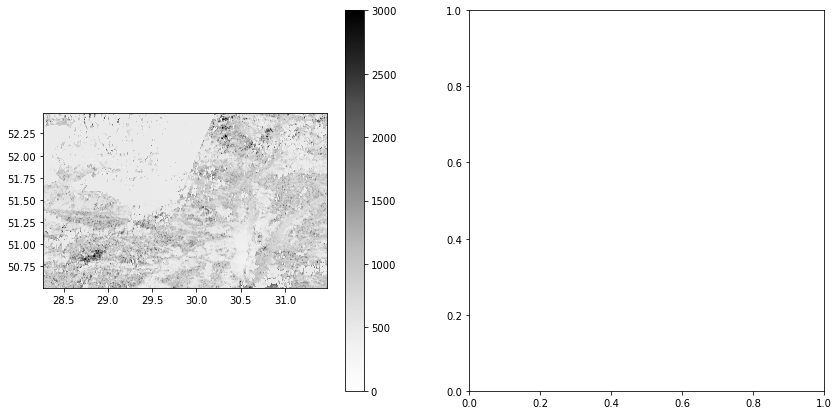

In [74]:
from matplotlib import pyplot
import rasterio.plot
import rasterio

years = range(1984, 2021)
habitats = ["hab", "chern"]
months = ["JFM", "AMJ", "JAS", "OND"]
directory = (
    "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data"
)
name_list = []
import os

for year in years:
    for month in months:
        for habitat in habitats:
            name = os.path.join(
                directory,
                str(year),
                "L5_" + habitat + "_" + str(year) + "_" + month + ".tif",
            )
            name_list.append(name)
# print(name_list)

for i in range(5, 6):
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14, 7))
    image = rasterio.open(name_list[i])
    image_data = image.read(1)
    # use imshow so that we have something to map the colorbar to
    image_hidden = axrgb.imshow(image_data, cmap="Greys", vmin=0, vmax=3000)
    # plot on the same axis with rio.plot.show
    new_image = rasterio.plot.show(
        image_data, transform=image.transform, ax=axrgb, 
        cmap="Greys", vmin=0, vmax=3000
    )
    # add colorbar using the now hidden image
    fig.colorbar(image_hidden, ax=axrgb)
    print(name_list[i])
    # rasterio.plot.show(image, transform=image.transform)
    # rasterio.plot.show(image, transform=image.transform, ax=axrgb)
    rasterio.plot.show_hist(
        image,
        bins=50,
        histtype="stepfilled",
        lw=0.0,
        stacked=False,
        alpha=0.3,
        ax=axhist,
    )
    pyplot.show()

## Image 

In [5]:
image.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 11905,
 'height': 7361,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, 28.266478561633278,
        0.0, -0.00026949458523585647, 52.484609463853516)}

In [41]:
dir(image)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_get_rpcs',
 '_handle_crswkt',
 '_has_band',
 '_has_gcps_or_rpcs',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_rpcs',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_set_rpcs',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum

In [42]:
image.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 11905,
 'height': 7361,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, 28.266478561633278,
        0.0, -0.00026949458523585647, 52.484609463853516)}

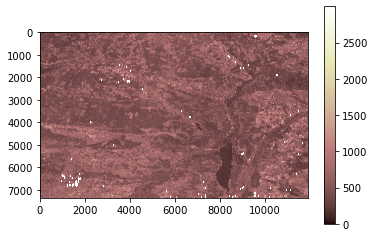

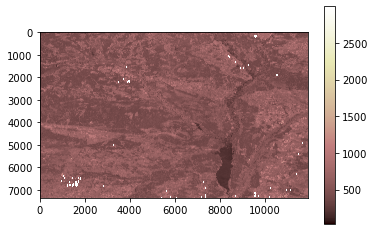

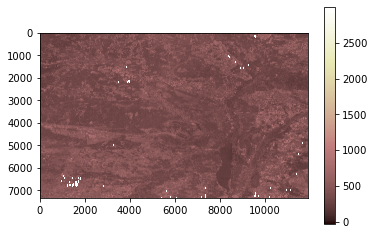

In [8]:
import numpy as np
import numpy.ma as ma
import rasterio
import matplotlib.pyplot as plt
image = rasterio.open("/gws/nopw/j04/ai4er/guided-team-challenge/"
                       + "2021/biodiversity/gee_satellite_data/"
                       + "2012/L7_chern_2012_AMJ.tif")
for i in range(1, image.meta['count'] + 1):
    plt.imshow(ma.masked_where(image.read(i) >= 3e3, 
                               image.read(i)).filled(np.nan), 
               cmap='pink')
    plt.colorbar()
    plt.show()

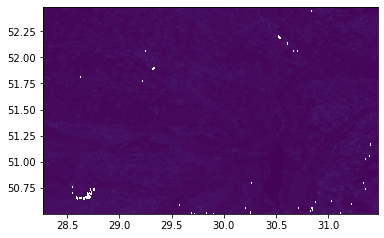

<AxesSubplot:>

In [49]:
rasterio.plot.show(image)

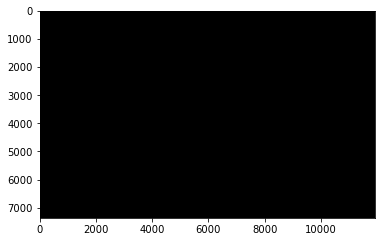

In [1]:
import numpy as np
import numpy.ma as ma
import rasterio
import matplotlib.pyplot as plt

# Open the file:
raster = rasterio.open("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2012/L7_chern_2012_AMJ.tif")

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    limit = 10e4
    ma.masked_where(array >= limit, array)
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(1)
red = raster.read(2)
green = raster.read(3)

# Normalize band DN
blue_norm = normalize(nir)
green_norm = normalize(red)
red_norm = normalize(green)

# Stack bands
nrg = np.dstack((blue_norm, green_norm, red_norm))

# View the color composite
plt.imshow(nrg)